<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Regression Code-Along Project 

Let's now apply our knowledge to a more realistic dataset. Here we will also focus on feature engineering and cleaning our data.

## The Data

We will be using King County housing data taken from Kaggle:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* **id** - Unique ID for each home sold
* **date** - Date of the home sale
* **bedrooms** - Number of bedrooms
* **bathrooms** - Number of bathrooms, where 0.5 accounts for a room with a toilet but no shower
* **sqft_living** - Square footage of the apartments interior living space
* **sqft_lot** - Square footage of the land space
* **floors** - Number of floors
* **waterfront** - A 'dummy' variable for whether the apartment was overlooking the waterfront or not
* **view** - An index from 0 to 4 of how good the view of the property was
* **condition** - An index from 1 to 5 on the condition of the apartment,
* **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above** - The square footage of the interior housing space that is above ground level
* **sqft_basement** - The square footage of the interior housing space that is below ground level
* **yr_built** - The year the house was initially built
* **yr_renovated** - The year of the house’s last renovation
* **zipcode** - What zipcode area the house is in
* **lat** - Lattitude
* **long** - Longitude
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

#### Target Column

* **price** - Price of each home sold 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
# Average house price is approx. $540,000 (just over half a million)

<Figure size 1200x800 with 0 Axes>

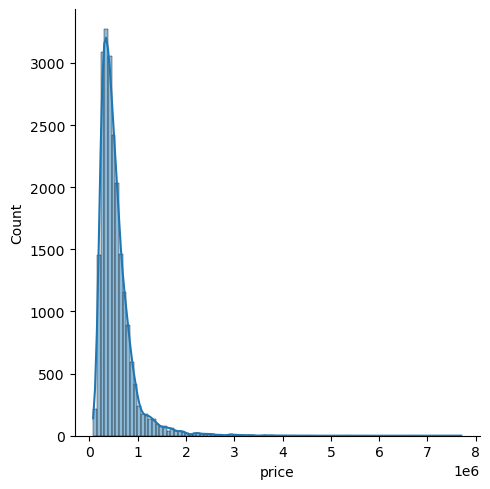

In [7]:
plt.figure(figsize=(12, 8))

sns.displot(df['price'], bins=100, kde=True);

In [ ]:
# Distribution of house prices is 'normal' around half million mark (1e6 is notation for 1 million)
# Many outliers found between 3 and 8 million dollars (max house price $7.7 million)
# This means we probably best at predicting house prices between 0 and 2 million dollars

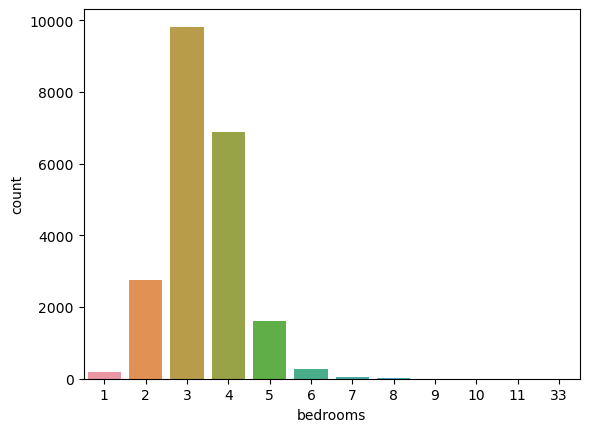

In [10]:
sns.countplot(x='bedrooms', data=df);

In [ ]:
# Majority of houses have 3 bedrooms, followed by 4 bedrooms
# We have an outlier of 33 bedrooms!

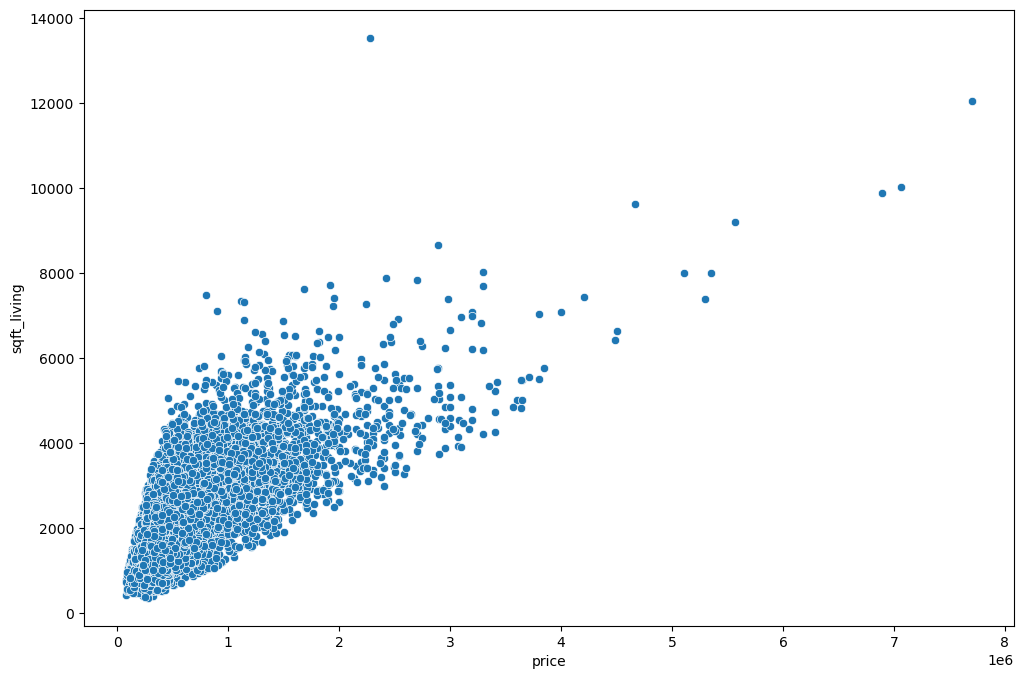

In [11]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='price', y='sqft_living', data=df);

In [ ]:
# As interior square footage increases, so does the house price which suggests strong correlation

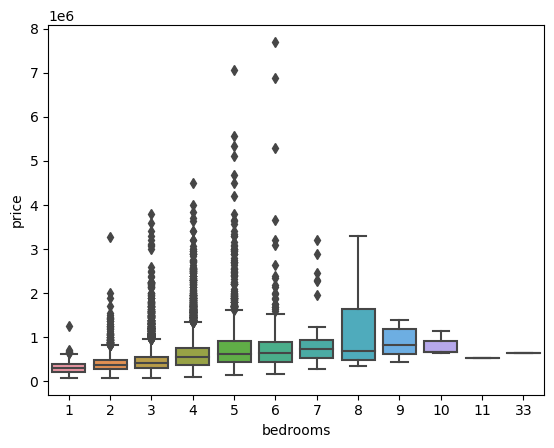

In [21]:
sns.boxplot(x='bedrooms', y='price', data=df);

In [ ]:
# Based on increasing number of bedrooms, the average house price increases slightly
# More variation in price when you have 3-6 bedrooms, meaning some unlucky people have paid a lot more than necessary

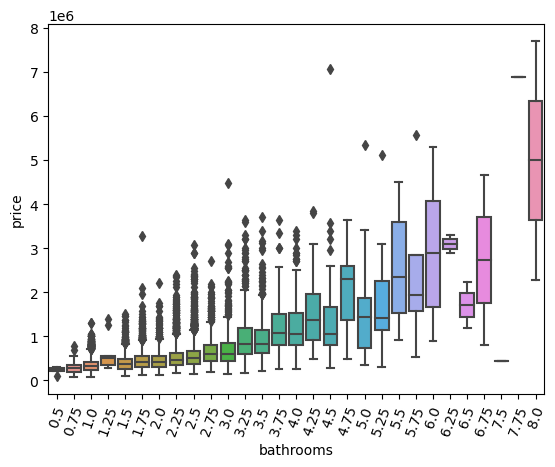

In [25]:
sns.boxplot(x='bathrooms', y='price', data=df)
plt.xticks(rotation=70);

In [ ]:
# More variation in house price when there are between 1.75 and 3.5 bathrooms (0.5 stands for toilet only)
# Steady increase in average house price as no of bathrooms increase suggests strong correlation

In [16]:
# Check correlation of features with target column

df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [ ]:
# 'sqft_living', 'grade', and 'sqft_above' are most positively correlated variables (grade is 1-13 for construction quality)
# Interestingly, no of bathrooms has much greater correlation than no of bedrooms
# 'zipcode' has most negative correlation, i.e. as zipcode increases, price decreases!! 
# Zip code is treated as continuous numerical variable, when in reality it should be categorical

### Geographical Properties

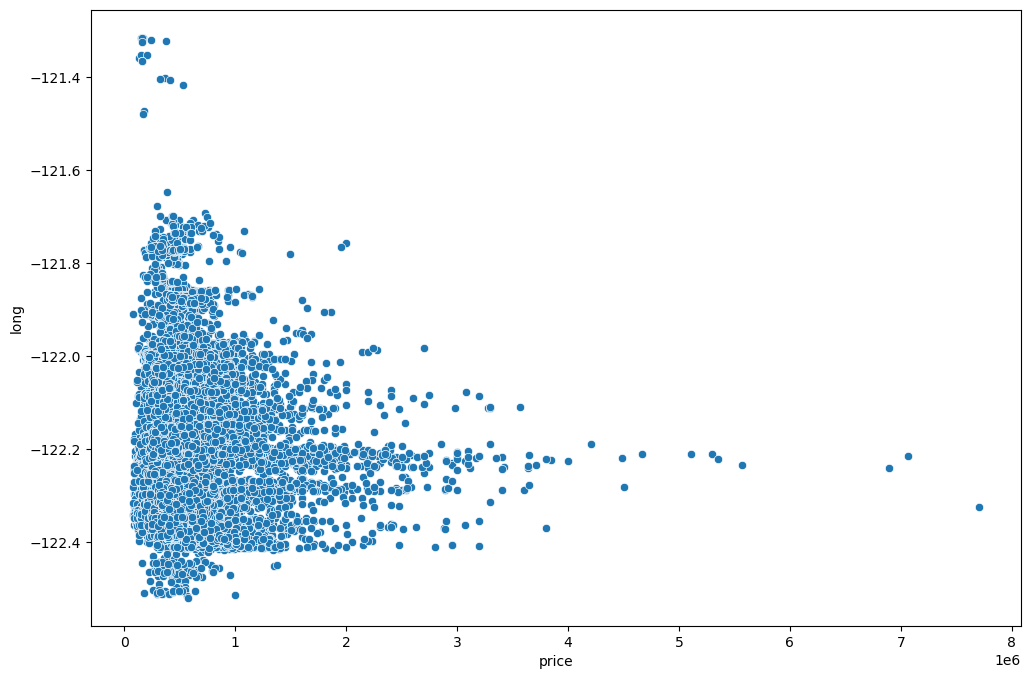

In [17]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='price', y='long', data=df);

In [18]:
# Based on longitude, there is weak relationship with house price
# Some outliers at longitude of -122.2 indicating an expensive area

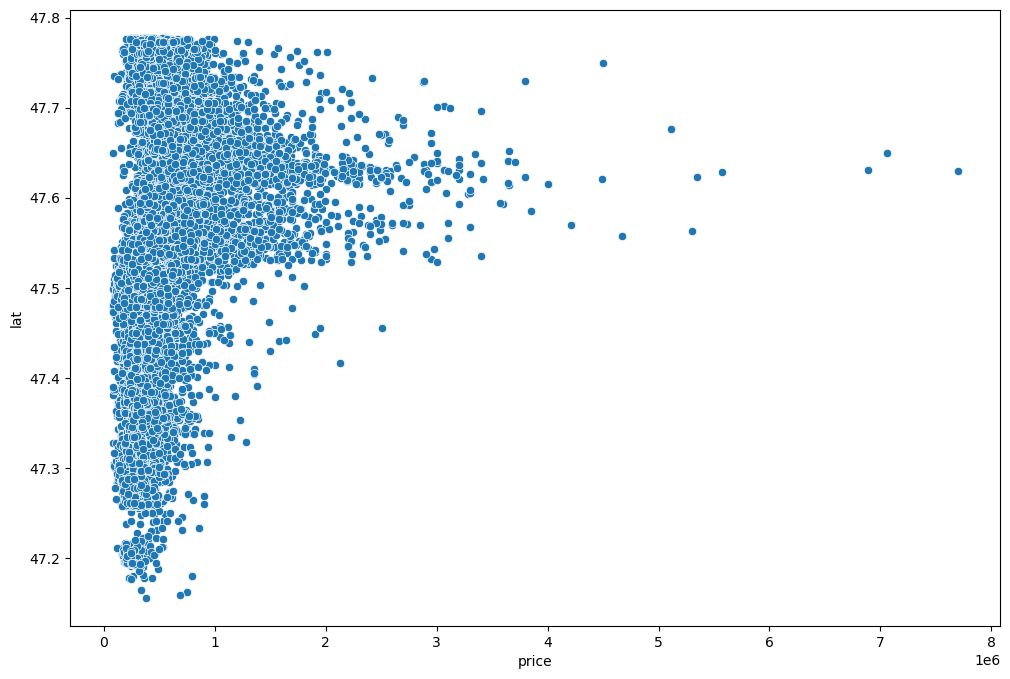

In [19]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='price', y='lat', data=df);

In [ ]:
# Based on latitude only, there is slightly less weak relationship with house prices
# Between latitude 47.55 and 47.7 there are some outliers indicating an expensive area 

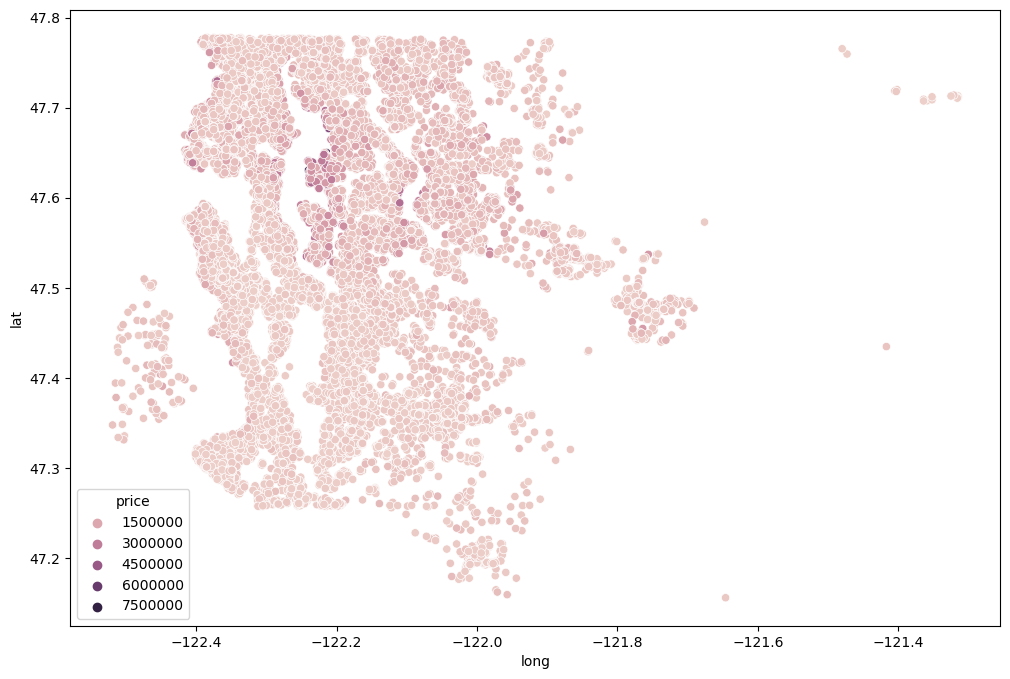

In [26]:
# Combing latitude and longitude will clarify where these expensive areas are

plt.figure(figsize=(12, 8))

sns.scatterplot(x='long', y='lat', data=df, hue='price');

In [ ]:
# Now we can see certain areas which have higher house prices - along the coasts! These are the outliers
# The colour gradient with the rest of houses is not good...

In [37]:
# See the outliers - maybe we should drop them?
# Based on distribution plot of prices, we should have cut-off point around $3 million, so take out approx 1% of data

df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [38]:
# How many rows constitute 1% of data? 216 rows (or houses)

len(df) * (0.01)

215.97

In [40]:
# Sample out the top 1% of the rows with sorted values (i.e. first 216 rows)

top_1_perc_price = df.sort_values('price', ascending=False).iloc[216:]

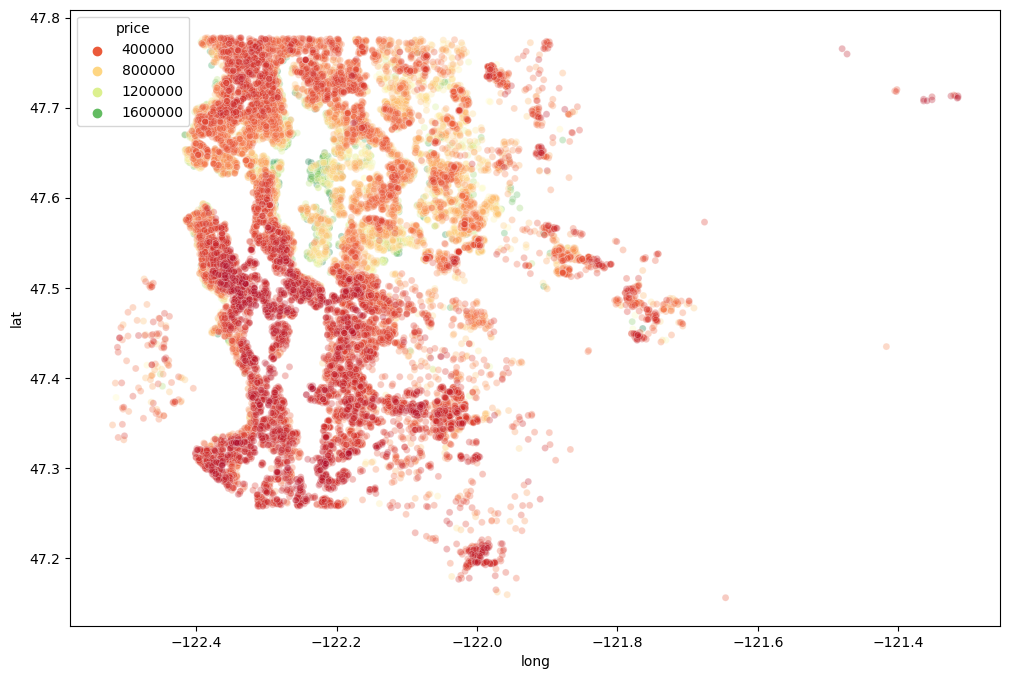

In [48]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='long', y='lat', data=top_1_perc_price, hue='price', palette='RdYlGn', s=25, edgecolors='black', alpha=0.3);

In [ ]:
# Better colour gradation in the top 1% of house prices

### Other Features

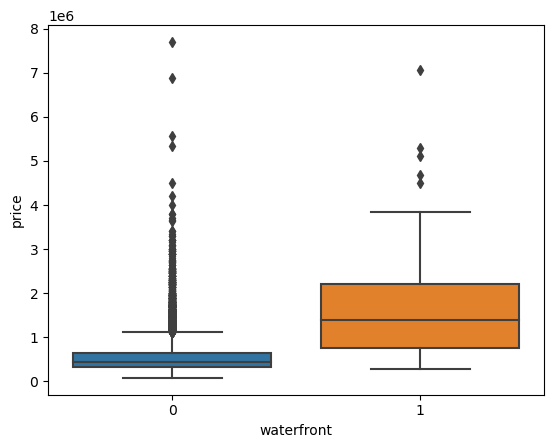

In [49]:
# There is clear separation between ranges where bulk of house prices fall based on waterfront location
# Locations without waterfront tend to be less expensive but there is more variation in the outliers

sns.boxplot(x='waterfront', y='price', data=df);

## Feature Selection

In [50]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [52]:
# Remove 'id' column - it is redundant

df = df.drop('id',axis=1)

In [53]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering DateTime object

In [54]:
df['date'] = pd.to_datetime(df['date'])

In [55]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [57]:
# Create new 'month' column

df['month'] = df['date'].apply(lambda date:date.month)

In [58]:
# Create new 'year' column

df['year'] = df['date'].apply(lambda date:date.year)

In [70]:
df['year'].value_counts()

2014    14622
2015     6975
Name: year, dtype: int64

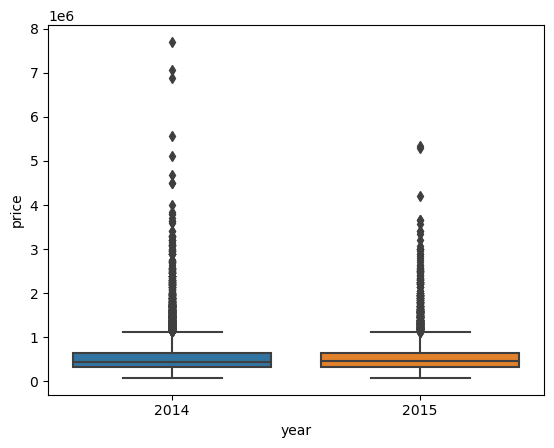

In [60]:
sns.boxplot(x='year', y='price', data=df);

In [ ]:
# Very little change in house prices between 2014 and 2015, except for more variation in outlier prices during 2014
# Practically identical house price average 

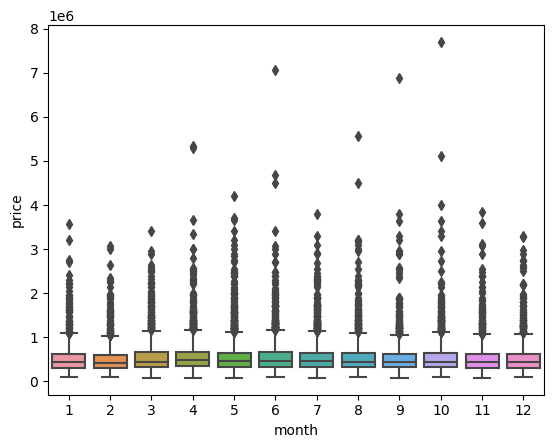

In [61]:
sns.boxplot(x='month', y='price', data=df);

In [ ]:
# More variation in outlier prices between months April and October for every year
# may be when there are more buyers hence higher asking prices

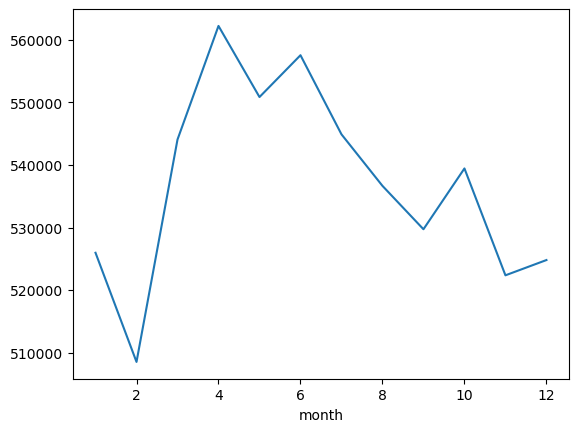

In [62]:
# Plot average house price per month for clarity

df.groupby('month').mean()['price'].plot();

In [ ]:
# As you can see, house prices are generally at their highest around April with downward direction as year goes on
# Lowest house prices around February! Shorter month hence less time for competitive house pricing maybe...

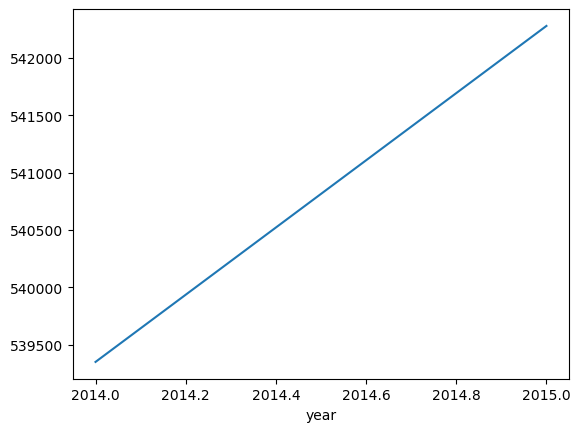

In [63]:
df.groupby('year').mean()['price'].plot();

In [ ]:
# Steady increase in average house price from 2014 to 2015, i.e. natural inflation

In [64]:
# Original date column is now redundant
df = df.drop('date', axis=1)

In [65]:
# What are the remaining columns?
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [66]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [67]:
# SEATTLE ZIPCODE MAP  https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove zipcode, or feature engineer categories from it, e.g. map to regions in King County
# Group zipcodes into two or three categories etc. Domain knowledge is necessary for this

df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [68]:
# We are going to drop the zipcode variable due to lack of domain knowledge

df = df.drop('zipcode', axis=1)

In [69]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [71]:
# 'yr_renovated' could be trouble, because 0 means 'not renovated' - but this is OK
# Variable makes sense due to scaling, e.g. the more renovated properties in more recent years, hence higher price values

df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [72]:
# Square footage below ground level - note that some properties have no basement, i.e. 0 (min value)

df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [73]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

## Train Test Split

In [87]:
X = df.drop('price', axis=1).values

y = df['price'].values

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Scaling

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
X_train= scaler.fit_transform(X_train)

In [93]:
X_test = scaler.transform(X_test)

In [94]:
X_train.min()

0.0

In [95]:
X_train.max()

1.0

In [96]:
X_test.min()

-9.329739828542699e-06

In [97]:
X_test.max()

3.2

## Creating a Model

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [86]:
model = Sequential()

# 19 features, hence 19 units/neurons per layer
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

# Outer layer with single neuron
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse')

## Training the Model

In [98]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430243053568.0000 - val_loss: 418927050752.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429142343680.0000 - val_loss: 414907301888.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 411803254784.0000 - val_loss: 374108422144.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 325060296704.0000 - val_loss: 236210372608.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 166453248000.0000 - val_loss: 105704882176.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 101206900736.0000 - val_loss: 94984404992.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97326465024.0000 - val_loss: 93284220928.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95515287552.0000 - val_loss: 91534884864.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 36601184256.0000 - val_loss: 35299667968.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 36501090304.0000 - val_loss: 35183190016.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 36374532096.0000 - val_loss: 35076177920.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 36303966208.0000 - val_loss: 34972987392.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 36140150784.0000 - val_loss: 34869690368.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 36040957952.0000 - val_loss: 34753134592.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 35942522880.0000 - val_loss: 34636578816.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 35825127424.0000 - val_loss: 34563117056.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32571238400.0000 - val_loss: 31069581312.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32521379840.0000 - val_loss: 31050817536.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32513923072.0000 - val_loss: 31112667136.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32470833152.0000 - val_loss: 30976778240.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32428179456.0000 - val_loss: 30951108608.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32421505024.0000 - val_loss: 30881427456.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32405551104.0000 - val_loss: 30847119360.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32356163584.0000 - val_loss: 30813454336.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31085672448.0000 - val_loss: 29262981120.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31073189888.0000 - val_loss: 29233143808.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31038687232.0000 - val_loss: 29341302784.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31054327808.0000 - val_loss: 29191274496.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31045787648.0000 - val_loss: 29163220992.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31008690176.0000 - val_loss: 29134946304.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31019198464.0000 - val_loss: 29142601728.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 30973411328.0000 - val_loss: 29132476416.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30163353600.0000 - val_loss: 28185634816.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30150873088.0000 - val_loss: 28117440512.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30141796352.0000 - val_loss: 28060160000.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30168854528.0000 - val_loss: 28025948160.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30090409984.0000 - val_loss: 28073881600.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30069932032.0000 - val_loss: 27955988480.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30123653120.0000 - val_loss: 27986690048.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30081159168.0000 - val_loss: 28005070848.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29378000896.0000 - val_loss: 27030943744.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 29391908864.0000 - val_loss: 26998902784.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29379391488.0000 - val_loss: 27071930368.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29363582976.0000 - val_loss: 26978322432.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 29334964224.0000 - val_loss: 26935183360.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29312944128.0000 - val_loss: 26999912448.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 29306095616.0000 - val_loss: 26940452864.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 29295462400.0000 - val_loss: 26958718976.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28723412992.0000 - val_loss: 26070601728.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 28681259008.0000 - val_loss: 26066198528.0000


In [99]:
losses = pd.DataFrame(model.history.history)

In [100]:
losses

,loss,val_loss
0,4.302431e+11,4.189271e+11
1,4.291423e+11,4.149073e+11
2,4.118033e+11,3.741084e+11
3,3.250603e+11,2.362104e+11
4,1.664532e+11,1.057049e+11
...,...,...
395,2.871132e+10,2.614653e+10
396,2.874063e+10,2.620707e+10
397,2.870591e+10,2.614920e+10
398,2.872341e+10,2.607060e+10


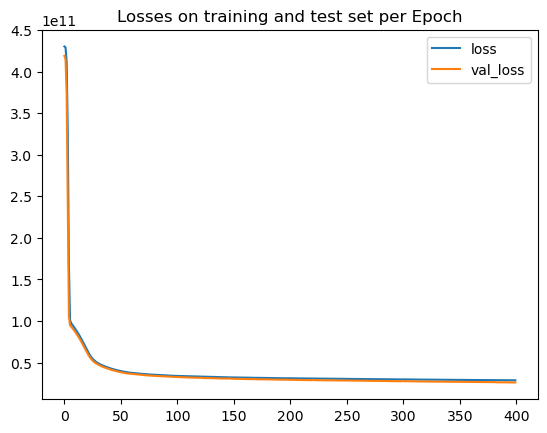

In [104]:
losses.plot()
plt.title('Losses on training and test set per Epoch');

In [ ]:
# The loss function measures the same along the epochs for both training and test set - GOOD!
# Value is still dropping past 400 epochs albeit much more slowly so no overfitting occurring

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

#### Predicting on Brand New Data

In [106]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [107]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 938us/step


In [108]:
# MAE is average error of $99,937 when predicting house prices

mean_absolute_error(y_test, predictions)

99937.08989800347

In [109]:
# RMSE is more precise error of $161,450 when predicting

np.sqrt(mean_squared_error(y_test, predictions))

161450.30545846067

In [110]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [112]:
df['price'].median()

450000.0

In [ ]:
# Average price is $540,000, and if you are $99,937 off, you are approx 20% off from the true value - NOT GOOD!

In [111]:
# Explained Variance Score (r2) indicates how much variance is explained by model (1 is max value)

explained_variance_score(y_test, predictions)

0.8034472154322966

In [ ]:
# Not bad...but do we have another model that performs better?
# Since we have not reached overfitting, we can increase number of epochs

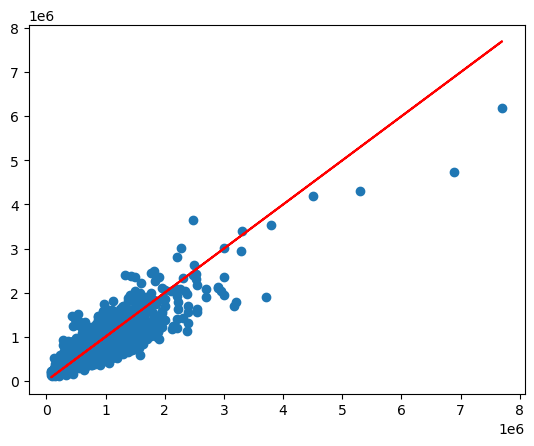

In [113]:
# Plot predictions
plt.scatter(y_test, predictions)

# Plot true values (straight line)
plt.plot(y_test, y_test, 'r');

In [ ]:
# As you can see we are being punished by the large outliers, so cannot predict for expensive homes
# Between 0 and 2 million dollar priced homes, we are better at predicting which explains high explained variance score
# It would be good to re-train model with top 1% taken out (depends what problem you are trying to solve)

In [117]:
errors = y_test.reshape(6480, 1) - predictions

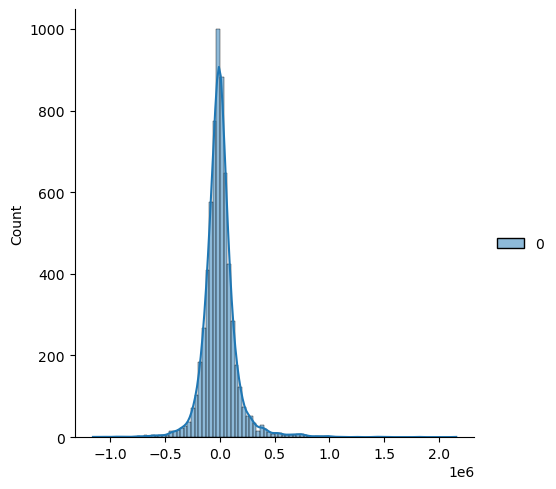

In [118]:
sns.displot(errors, bins=100, kde=True);

In [ ]:
# Errors are 'normally' distributed around 0 mean value

-------------
### Predicting on a brand new house

In [119]:
single_house = df.drop('price', axis=1).iloc[0]

In [120]:
# Add second pair of brackets by re-shaping array of values (-1 means 'nesting' original dimensions when adding new level)
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [121]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [122]:
model.predict(single_house)

1/1 [==============================] - 0s 38ms/step


array([[287124.47]], dtype=float32)

In [ ]:
# For the 1st-occuring row in DataFrame, house price is predicted as $287,124.47
# The actual value was $221,900 which means we are not bad, but not great - approx $65,000 above true value

In [123]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64